# CRLBF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_crlbf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/crlbf.csv')
df_crlbf['Date'] = pd.to_datetime(df_crlbf['Date'])
df_crlbf = df_crlbf.set_index('Date')
df_crlbf = df_crlbf.rename(columns={'Open':'crlbf_Open', 'High':'crlbf_High', 'Low':'crlbf_Low', 'Close':'crlbf_Close', 'Volume':'crlbf_Volume'})
df_crlbf = df_crlbf.drop('Adj Close', axis=1)
df_crlbf['crlbf_prev_close'] = df_crlbf['crlbf_Close'].shift(1)
df_crlbf['crlbf_next_close'] = df_crlbf['crlbf_Close'].shift(-1)
df_crlbf['crlbf_diff'] = df_crlbf['crlbf_Close'].diff()
df_crlbf['crlbf_%change'] = df_crlbf['crlbf_Close'].pct_change()
df_crlbf['crlbf_5day_avg_close'] = df_crlbf['crlbf_Close'].rolling(5).mean()
df_crlbf['crlbf_5day_avg_diff'] = df_crlbf['crlbf_diff'].rolling(5).mean()
df_crlbf['crlbf_10day_avg_close'] = df_crlbf['crlbf_Close'].rolling(10).mean()
df_crlbf['crlbf_10day_avg_diff'] = df_crlbf['crlbf_diff'].rolling(10).mean()

In [4]:
df_crlbf

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340               NaN      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff  
Date                              
2018-12-03                   NaN  
2018-12-04                   NaN  
2018-12-06                   NaN  
2018-12-07                   NaN  
2018-12-10                   NaN  
...                          ...  
2022-05-03               -0.1250  
2022-05-04               -0.1290  
2022-05-05               -0.1227  
2022-05-06               -0.1005  
2022-05-09               -0.1110  

[864 rows x 13 columns]

In [5]:
cut = df_crlbf.index.min()
cut

Timestamp('2018-12-03 00:00:00')

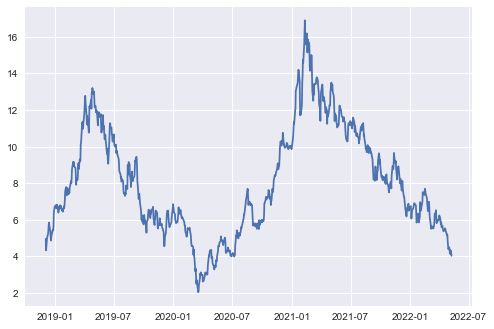

In [6]:
plt.plot(df_crlbf['crlbf_Close'])

## CRLBF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_crlbf, df_dow, on='Date', how='left')
df0

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340               NaN      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                   NaN   25779.57   25980.21  25670.51    25826.43   
2018-12-04                   NaN   25752.56   25773.12  25008.11    25027.07   
2018-12-06                   NaN   24737.42   24951.01  24242.22    24947.67   
2018-12-07                   NaN   24918.82   25095.62  24284.78    24388.95   
2018-12-10                   NaN   24360.95   24500.81  23881.37    24423.26   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.1250   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.1290   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.1227   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.1005   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [9]:
df_isna0 = df0.isna()
df_isna0

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       False       False      False        False         False   
2018-12-04       False       False      False        False         False   
2018-12-06       False       False      False        False         False   
2018-12-07       False       False      False        False         False   
2018-12-10       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03              True             False        True           True   
2018-12-04             False             False       False          False   
2018-12-06             False             False       False          False   
2018-12-07             False             False       False          False   
2018-12-10             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                  True                 True                   True   
2018-12-04                  True                 True                   True   
2018-12-06                  True                 True                   True   
2018-12-07                  True                 True                   True   
2018-12-10                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                  True      False      False     False       False   
2018-12-04                  True      False      False     False       False   
2018-12-06                  True      False      False     False       False   
2018-12-07                  True      False      False     False       False   
2018-12-10                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-03                 False      False      False     False       False   
2022-05-04                 False      False      False     False       False   
2022-05-05                 False      False      False     False       False   
2022-05-06                 False      False      False     False       False   
2022-05-09          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000                  0.0                    0.0   
2018-12-04                0.0000                  0.0                    0.0   
2018-12-06                0.0000                  0.0                    0.0   
2018-12-07                0.0000                  0.0                    0.0   
2018-12-10                4.8566                  0.0                    0.0   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                   0.0   25779.57   25980.21  25670.51    25826.43   
2018-12-04                   0.0   25752.56   25773.12  25008.11    25027.07   
2018-12-06                   0.0   24737.42   24951.01  24242.22    24947.67   
2018-12-07                   0.0   24918.82   25095.62  24284.78    24388.95   
2018-12-10                   0.0   24360.95   24500.81  23881.37    24423.26   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-12-03  388505418.0         25538.46         25027.07     287.97   
2018-12-04  418984696.0         25826.43         24947.67    -799.36   
2018-12-06  471673514.0         25027.07         24388.95     -79.40   
2018-12-07  398190611.0         24947.67         24423.26    -558.72   
2018-12-10  389679536.0         24388.95         24370.24      34.31   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-12-03      0.011276            25363.778             237.238   
2018-12-04     -0.030951            25419.446              55.668   
2018-12-06     -0.003173            25335.694             -83.752   
2018-12-07     -0.022396            25145.716            -189.978   
2018-12-10      0.001407            24922.676            -223.040   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-12-03             24969.285               41.321  
2018-12-04             24970.248                0.963  
2018-12-06             25018.451               48.203  
2018-12-07             25010.877               -7.574  
2018-12-10             25024.608               13.731

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340             0.000      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000               0.0000                 0.0000   
2018-12-04                0.0000               0.0000                 0.0000   
2018-12-06                0.0000               0.0000                 0.0000   
2018-12-07                0.0000               0.0000                 0.0000   
2018-12-10                4.8566               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-12-03                0.0000   25779.57   25980.21  25670.51    25826.43   
2018-12-04                0.0000   25752.56   25773.12  25008.11    25027.07   
2018-12-06                0.0000   24737.42   24951.01  24242.22    24947.67   
2018-12-07                0.0000   24918.82   25095.62  24284.78    24388.95   
2018-12-10                0.0000   24360.95   24500.81  23881.37    24423.26   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.1250   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.1290   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.1227   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.1005   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'crlbf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   
2018-12-07     12    7  2018        4       5.194       5.420      4.999   
2018-12-10     12   10  2018        4       5.022       5.338      5.022   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2018-12-03        4.962        174800             0.000             4.340   
2018-12-04        4.340        269400             4.962             4.750   
2018-12-06        4.750        217100             4.340             5.000   
2018-12-07        5.000        187000             4.750             5.231   
2018-12-10        5.231        165200             5.000             5.380   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                0.0000   
2018-12-04      -0.622      -0.125353                0.0000   
2018-12-06       0.410       0.094470                0.0000   
2018-12-07       0.250       0.052632                0.0000   
2018-12-10       0.231       0.046200                4.8566   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   
2018-12-07                  0.0                    0.0                   0.0   
2018-12-10                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-12-03   25779.57   25980.21  25670.51    25826.43  388505418.0   
2018-12-04   25752.56   25773.12  25008.11    25027.07  418984696.0   
2018-12-06   24737.42   24951.01  24242.22    24947.67  471673514.0   
2018-12-07   24918.82   25095.62  24284.78    24388.95  398190611.0   
2018-12-10   24360.95   24500.81  23881.37    24423.26  389679536.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-12-03         25538.46         25027.07     287.97      0.011276   
2018-12-04         25826.43         24947.67    -799.36     -0.030951   
2018-12-06         25027.07         24388.95     -79.40     -0.003173   
2018-12-07         24947.67         24423.26    -558.72     -0.022396   
2018-12-10         24388.95         24370.24      34.31      0.001407   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-12-03            25363.778             237.238             24969.285   
2018-12-04            25419.446              55.668             24970.248   
2018-12-06            25335.694             -83.752             25018.451   
2018-12-07            25145.716            -189.978             25010.877   
2018-12-10            24922.676            -223.040             25024.608   

            djix_10day_avg_diff  crlbf_Open_b  crlbf_High_b  crlbf_Low_b  \
Date                                                                       
2018-12-03               41.321         False         False        False   
2018-12-04                0.963         False         False        False   
2018-12-06               48.203         False         False        False   
2018-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(863, 56)

In [18]:
n = int(len(df0) * 0.9)
n

776

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

776
87


In [21]:
X_train0 = train0.drop('crlbf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2018-12-03        4.962        174800             0.000       0.000   
2018-12-04        4.340        269400             4.962      -0.622   
2018-12-06        4.750        217100             4.340       0.410   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2018-12-03       0.000000                   0.0                  0.0   
2018-12-04      -0.125353                   0.0                  0.0   
2018-12-06       0.094470                   0.0                  0.0   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-12-03                    0.0                   0.0   25779.57   25980.21   
2018-12-04                    0.0                   0.0   25752.56   25773.12   
2018-12-06                    0.0                   0.0   24737.42   24951.01   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-12-03  25670.51    25826.43  388505418.0         25538.46   
2018-12-04  25008.11    25027.07  418984696.0         25826.43   
2018-12-06  24242.22    24947.67  471673514.0         25027.07   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-12-03         25027.07     287.97      0.011276            25363.778   
2018-12-04         24947.67    -799.36     -0.030951            25419.446   
2018-12-06         24388.95     -79.40     -0.003173            25335.694   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-12-03             237.238             24969.285               41.321   
2018-12-04              55.668             24970.248                0.963   
2018-12-06             -83.752             25018.451               48.203   

            crlbf_Open_b  crlbf_High_b  crlbf_Low_b  crlbf_Close_b  \
Date                                                                 
2018-12-03         False         False        False          False   
2018-12-04         False         False        False          False   
2018-12-06         False         False        False          False   

            crlbf_Volume_b  crlbf_prev_close_b  crlbf_next_close_b  \
Date                                                                 
2018-12-03           False                True               False   
2018-12-04           False               False               False   
2018-12-06           False               False               False   

            crlbf_diff_b  crlbf_%change_b  crlbf_5day_avg_close_b  \
Date                                                                
2018-12-03          True             True                    True   
2018-12-04         False            False                    True   
2018-12-06         False            False                    True   

            crlbf_5day_avg_diff_b  crlbf_10day_avg_close_b  \
Date                                                         
2018-12-03                   True                     True   
2018-12-04                   True                     True   
2018-12-06                   True                     True   

            crlbf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(776, 55)

In [23]:
y_train0 = train0['crlbf_next_close']
y_train0.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('crlbf_next_close', axis=1)
y_test0 = test0['crlbf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2022-01-03      1    3  2022        1        6.67        7.27      6.670   
2022-01-04      1    4  2022        1        6.98        6.98      6.460   
2022-01-05      1    5  2022        1        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75        617200              6.67        0.08   
2022-01-04         6.55        465200              6.75       -0.20   
2022-01-05         6.07       1301600              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2022-01-03                 6.5559                0.0090   36321.59   36595.82   
2022-01-04                 6.5849                0.0290   36636.00   36934.84   
2022-01-05                 6.5730               -0.0119   36722.60   36952.65   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2022-01-03  36246.45    36585.06  436598443.0         36338.30   
2022-01-04  36636.00    36799.65  543039217.0         36585.06   
2022-01-05  36400.39    36407.11  539088106.0         36799.65   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2022-01-03         36799.65     246.76      0.006791            36441.656   
2022-01-04         36407.11     214.59      0.005866            36521.944   
2022-01-05         36236.47    -392.54     -0.010667            36505.640   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2022-01-03              56.536             36063.997              121.962   
2022-01-04              80.288             36250.746              186.749   
2022-01-05             -16.304             36342.187               91.441   

            crlbf_Open_b  crlbf_High_b  crlbf_Low_b  crlbf_Close_b  \
Date                                                                 
2022-01-03         False         False        False          False   
2022-01-04         False         False        False          False   
2022-01-05         False         False        False          False   

            crlbf_Volume_b  crlbf_prev_close_b  crlbf_next_close_b  \
Date                                                                 
2022-01-03           False               False               False   
2022-01-04           False               False               False   
2022-01-05           False               False               False   

            crlbf_diff_b  crlbf_%change_b  crlbf_5day_avg_close_b  \
Date                                                                
2022-01-03         False            False                   False   
2022-01-04         False            False                   False   
2022-01-05         False            False                   False   

            crlbf_5day_avg_diff_b  crlbf_10day_avg_close_b  \
Date                                                         
2022-01-03                  False                    False   
2022-01-04                  False                    False   
2022-01-05                  False                    False   

            crlbf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(87, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([6.89841421, 6.42027254, 5.99139248, 6.29639004, 6.42281166])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.2223427872573404


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.18420181757214407


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['crlbf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['crlbf_next_close'])

In [36]:
y_test0['crlbf_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               4.517397
2022-05-03             4.210               4.471115
2022-05-04             4.133               4.020264
2022-05-05             4.340               4.031112
2022-05-06             4.040               4.195049

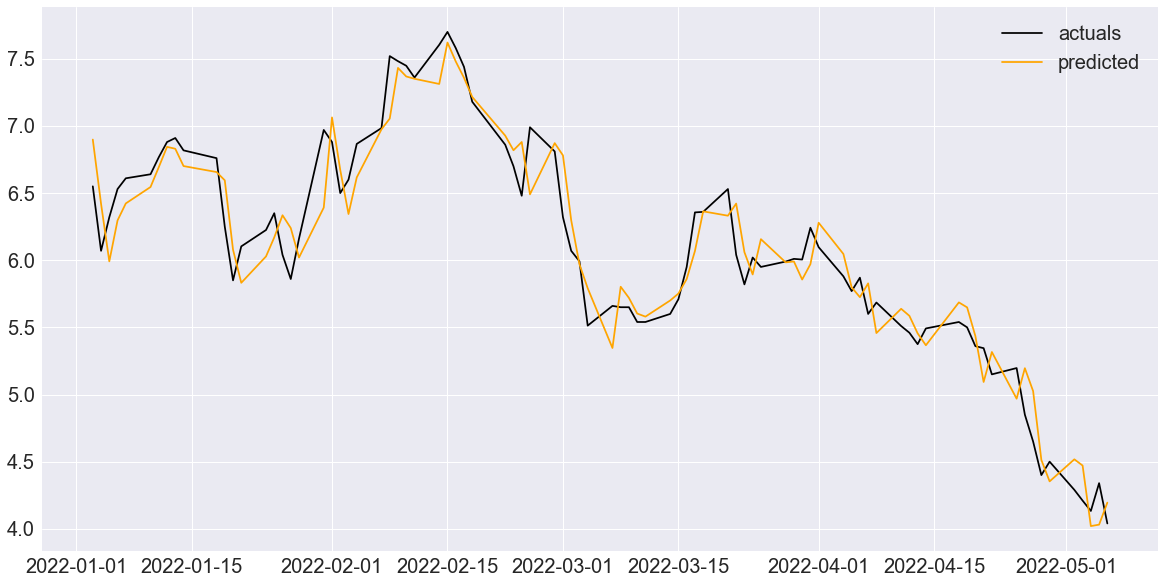

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['crlbf_next_close'], color='black')
ax.plot(y_test0['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRLBF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_crlbf, df_etfs, on='Date', how='left')
df1

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340               NaN      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   NaN  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   NaN  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   NaN  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   NaN  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   NaN  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1250   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1290   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1227   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1005   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [41]:
df_isna1 = df1.isna()
df_isna1

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       False       False      False        False         False   
2018-12-04       False       False      False        False         False   
2018-12-06       False       False      False        False         False   
2018-12-07       False       False      False        False         False   
2018-12-10       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03              True             False        True           True   
2018-12-04             False             False       False          False   
2018-12-06             False             False       False          False   
2018-12-07             False             False       False          False   
2018-12-10             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                  True                 True                   True   
2018-12-04                  True                 True                   True   
2018-12-06                  True                 True                   True   
2018-12-07                  True                 True                   True   
2018-12-10                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            crlbf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-12-03                  True    False    False   False     False   
2018-12-04                  True    False    False   False     False   
2018-12-06                  True    False    False   False     False   
2018-12-07                  True    False    False   False     False   
2018-12-10                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000                  0.0                    0.0   
2018-12-04                0.0000                  0.0                    0.0   
2018-12-06                0.0000                  0.0                    0.0   
2018-12-07                0.0000                  0.0                    0.0   
2018-12-10                4.8566                  0.0                    0.0   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   0.0  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   0.0  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   0.0  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   0.0  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   0.0  28.920000  29.430000  27.889999  28.600000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-12-03    2254500      29.360001      28.100000 -0.260001   -0.008856   
2018-12-04     628100      29.100000      27.549999 -1.000000   -0.034364   
2018-12-06     921100      28.100000      28.920000 -0.550001   -0.019573   
2018-12-07     964000      27.549999      28.600000  1.370001    0.049728   
2018-12-10     745900      28.920000      29.080000 -0.320000   -0.011065   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-12-03             29.234             0.018              29.333   
2018-12-04             29.124            -0.110              29.193   
2018-12-06             28.680            -0.444              29.058   
2018-12-07             28.606            -0.074              28.980   
2018-12-10             28.454            -0.152              28.835   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-12-03             -0.154        0.0        0.0       0.0         0.0   
2018-12-04             -0.140        0.0        0.0       0.0         0.0   
2018-12-06             -0.135        0.0        0.0       0.0         0.0   
2018-12-07             -0.078        0.0        0.0       0.0         0.0   
2018-12-10             -0.145        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-12-03          0.0              0.0              0.0        0.0   
2018-12-04          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340             0.000      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000               0.0000                 0.0000   
2018-12-04                0.0000               0.0000                 0.0000   
2018-12-06                0.0000               0.0000                 0.0000   
2018-12-07                0.0000               0.0000                 0.0000   
2018-12-10                4.8566               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                0.0000  29.850000  30.837999  28.350000  29.100000   
2018-12-04                0.0000  29.200001  29.410000  28.000000  28.100000   
2018-12-06                0.0000  26.400000  27.760000  26.100000  27.549999   
2018-12-07                0.0000  29.900000  29.900000  28.590000  28.920000   
2018-12-10                0.0000  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1250   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1290   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1227   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1005   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'crlbf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   
2018-12-07     12    7  2018        4       5.194       5.420      4.999   
2018-12-10     12   10  2018        4       5.022       5.338      5.022   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2       4.500       4.750      4.200   
2022-05-04      5    4  2022        2       4.220       4.414      4.050   
2022-05-05      5    5  2022        2       4.200       4.250      4.020   
2022-05-06      5    6  2022        2       3.920       4.340      3.820   
2022-05-09      5    9  2022        2       4.300       4.300      3.980   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2018-12-03        4.962        174800             0.000             4.340   
2018-12-04        4.340        269400             4.962             4.750   
2018-12-06        4.750        217100             4.340             5.000   
2018-12-07        5.000        187000             4.750             5.231   
2018-12-10        5.231        165200             5.000             5.380   
...                 ...           ...               ...               ...   
2022-05-03        4.290        552000             4.500             4.210   
2022-05-04        4.210        611800             4.290             4.133   
2022-05-05        4.133        663300             4.210             4.340   
2022-05-06        4.340        891400             4.133             4.040   
2022-05-09        4.040        454200             4.340             0.000   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                0.0000   
2018-12-04      -0.622      -0.125353                0.0000   
2018-12-06       0.410       0.094470                0.0000   
2018-12-07       0.250       0.052632                0.0000   
2018-12-10       0.231       0.046200                4.8566   
...                ...            ...                   ...   
2022-05-03      -0.210      -0.046667                4.5380   
2022-05-04      -0.080      -0.018648                4.4100   
2022-05-05      -0.077      -0.018290                4.3066   
2022-05-06       0.207       0.050085                4.2946   
2022-05-09      -0.300      -0.069124                4.2026   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03               0.0000                 0.0000                0.0000   
2018-12-04               0.0000                 0.0000                0.0000   
2018-12-06               0.0000                 0.0000                0.0000   
2018-12-07               0.0000                 0.0000                0.0000   
2018-12-10               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03              -0.1814                 4.9242               -0.1250   
2022-05-04              -0.1280                 4.7952               -0.1290   
2022-05-05              -0.1034                 4.6725               -0.1227   
2022-05-06              -0.0120                 4.5720               -0.1005   
2022-05-09              -0.0920                 4.4610               -0.1110   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-12-03  29.850000 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

776

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

776
87


In [52]:
X_train1 = train1.drop('crlbf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2018-12-03        4.962        174800             0.000       0.000   
2018-12-04        4.340        269400             4.962      -0.622   
2018-12-06        4.750        217100             4.340       0.410   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2018-12-03       0.000000                   0.0                  0.0   
2018-12-04      -0.125353                   0.0                  0.0   
2018-12-06       0.094470                   0.0                  0.0   

            crlbf_10day_avg_close  crlbf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-12-03                    0.0                   0.0  29.850000  30.837999   
2018-12-04                    0.0                   0.0  29.200001  29.410000   
2018-12-06                    0.0                   0.0  26.400000  27.760000   

            mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                     
2018-12-03   28.35  29.100000    2254500      29.360001      28.100000   
2018-12-04   28.00  28.100000     628100      29.100000      27.549999   
2018-12-06   26.10  27.549999     921100      28.100000      28.920000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-12-03 -0.260001   -0.008856             29.234             0.018   
2018-12-04 -1.000000   -0.034364             29.124            -0.110   
2018-12-06 -0.550001   -0.019573             28.680            -0.444   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-12-03              29.333             -0.154        0.0        0.0   
2018-12-04              29.193             -0.140        0.0        0.0   
2018-12-06              29.058             -0.135        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-12-03       0.0         0.0          0.0              0.0   
2018-12-04       0.0         0.0          0.0              0.0   
2018-12-06       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-12-03              0.0        0.0           0.0                  0.0   
2018-12-04              0.0        0.0           0.0                  0.0   
2018-12-06              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-12-03                 0.0                   0.0                  0.0   
2018-12-04                 0.0                   0.0                  0.0   
2018-12-06                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-12-03        0.0        0.0       0.0         0.0          0.0   
2018-12-04        0.0        0.0       0.0         0.0          0.0   
2018-12-

In [53]:
X_train1.shape

(776, 159)

In [54]:
y_train1 = train1['crlbf_next_close']
y_train1.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('crlbf_next_close', axis=1)
y_test1 = test1['crlbf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2022-01-03      1    3  2022        1        6.67        7.27      6.670   
2022-01-04      1    4  2022        1        6.98        6.98      6.460   
2022-01-05      1    5  2022        1        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75        617200              6.67        0.08   
2022-01-04         6.55        465200              6.75       -0.20   
2022-01-05         6.07       1301600              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-03                 6.5559                0.0090    11.21    11.59   
2022-01-04                 6.5849                0.0290    11.49    11.49   
2022-01-05                 6.5730               -0.0119    11.24    11.42   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-03   11.09     11.43    1204900          11.08          11.29   
2022-01-04   11.10     11.29    1065400          11.43          10.77   
2022-01-05   10.77     10.77    1626700          11.29          10.68   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-03     0.35    0.031588             11.210            -0.036   
2022-01-04    -0.14   -0.012248             11.212             0.002   
2022-01-05    -0.52   -0.046058             11.156            -0.056   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-03              11.346             -0.005      25.93      26.51   
2022-01-04              11.367              0.021      26.00      26.00   
2022-01-05              11.295             -0.072      25.00      25.00   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-03  25.709999   25.790001    1431400.0        25.590000   
2022-01-04  24.730000   24.780001    1284800.0        25.790001   
2022-01-05  23.233999   23.389999    1830100.0        24.780001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-03        24.780001   0.200001      0.007816               25.318   
2022-01-04        23.389999  -1.010000     -0.039162               25.334   
2022-01-05        23.879999  -1.390002     -0.056094               25.004   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-03               0.100             24.868000                0.169   
2022-01-04               0.016             25.019001                0.151   
2022-01-05              -0.330             24.997000               -0.022   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-03      12.96     13.341    12.960       13.21     174000.0   
2022-01-04      13.10     13.200    12.771       12.95     147500.0   
2022-01-05      12.86     12.950 

In [58]:
X_test1.shape

(87, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([6.59626474, 6.09728855, 6.29948628, 6.49117708, 6.47634805])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.19481326869625812


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.15457499925246676


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['crlbf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['crlbf_next_close'])

In [66]:
y_test1['crlbf_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               4.338916
2022-05-03             4.210               4.279909
2022-05-04             4.133               3.861612
2022-05-05             4.340               4.256888
2022-05-06             4.040               3.882931

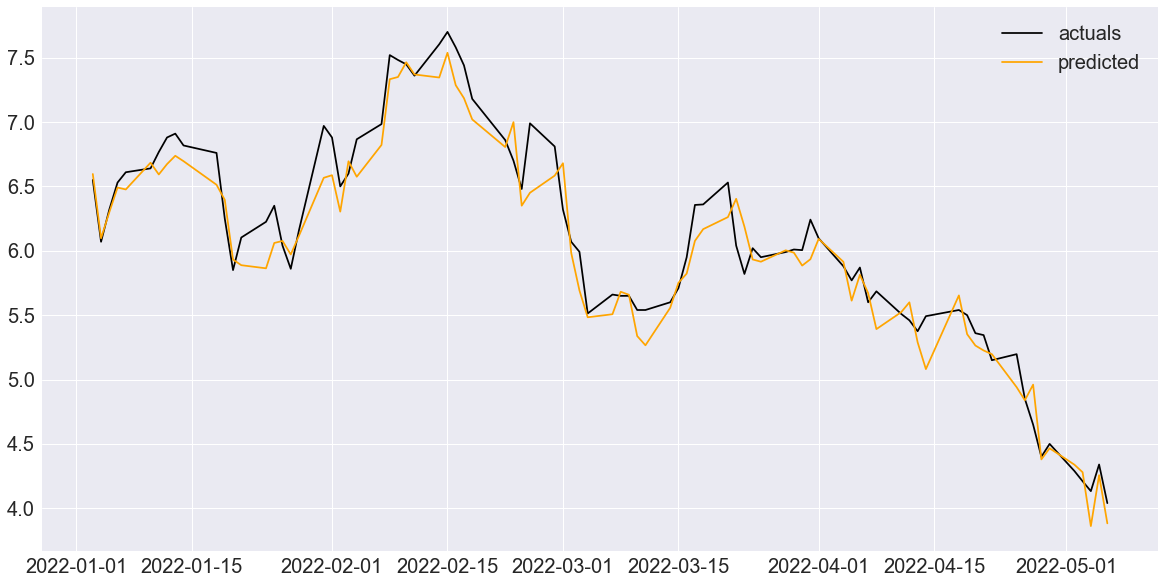

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['crlbf_next_close'], color='black')
ax.plot(y_test1['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CRLBF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_crlbf, df_etfs_dow, on='Date', how='left')
df2

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03               NaN             4.340         NaN            NaN   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340               NaN      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                   NaN                  NaN                    NaN   
2018-12-04                   NaN                  NaN                    NaN   
2018-12-06                   NaN                  NaN                    NaN   
2018-12-07                   NaN                  NaN                    NaN   
2018-12-10                4.8566                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   NaN  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   NaN  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   NaN  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   NaN  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   NaN  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1250   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1290   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1227   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1005   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [71]:
df_isna2 = df2.isna()
df_isna2

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       False       False      False        False         False   
2018-12-04       False       False      False        False         False   
2018-12-06       False       False      False        False         False   
2018-12-07       False       False      False        False         False   
2018-12-10       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03              True             False        True           True   
2018-12-04             False             False       False          False   
2018-12-06             False             False       False          False   
2018-12-07             False             False       False          False   
2018-12-10             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                  True                 True                   True   
2018-12-04                  True                 True                   True   
2018-12-06                  True                 True                   True   
2018-12-07                  True                 True                   True   
2018-12-10                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            crlbf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-12-03                  True    False    False   False     False   
2018-12-04                  True    False    False   False     False   
2018-12-06                  True    False    False   False     False   
2018-12-07                  True    False    False   False     False   
2018-12-10                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000                  0.0                    0.0   
2018-12-04                0.0000                  0.0                    0.0   
2018-12-06                0.0000                  0.0                    0.0   
2018-12-07                0.0000                  0.0                    0.0   
2018-12-10                4.8566                  0.0                    0.0   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                   0.0  29.850000  30.837999  28.350000  29.100000   
2018-12-04                   0.0  29.200001  29.410000  28.000000  28.100000   
2018-12-06                   0.0  26.400000  27.760000  26.100000  27.549999   
2018-12-07                   0.0  29.900000  29.900000  28.590000  28.920000   
2018-12-10                   0.0  28.920000  29.430000  27.889999  28.600000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-12-03    2254500      29.360001      28.100000 -0.260001   -0.008856   
2018-12-04     628100      29.100000      27.549999 -1.000000   -0.034364   
2018-12-06     921100      28.100000      28.920000 -0.550001   -0.019573   
2018-12-07     964000      27.549999      28.600000  1.370001    0.049728   
2018-12-10     745900      28.920000      29.080000 -0.320000   -0.011065   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-12-03             29.234             0.018              29.333   
2018-12-04             29.124            -0.110              29.193   
2018-12-06             28.680            -0.444              29.058   
2018-12-07             28.606            -0.074              28.980   
2018-12-10             28.454            -0.152              28.835   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-12-03             -0.154        0.0        0.0       0.0         0.0   
2018-12-04             -0.140        0.0        0.0       0.0         0.0   
2018-12-06             -0.135        0.0        0.0       0.0         0.0   
2018-12-07             -0.078        0.0        0.0       0.0         0.0   
2018-12-10             -0.145        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-12-03          0.0              0.0              0.0        0.0   
2018-12-04          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

crlbf_Open  crlbf_High  crlbf_Low  crlbf_Close  crlbf_Volume  \
Date                                                                       
2018-12-03       5.300       5.520      4.742        4.962        174800   
2018-12-04       5.152       5.165      4.186        4.340        269400   
2018-12-06       5.071       5.145      4.320        4.750        217100   
2018-12-07       5.194       5.420      4.999        5.000        187000   
2018-12-10       5.022       5.338      5.022        5.231        165200   
...                ...         ...        ...          ...           ...   
2022-05-03       4.500       4.750      4.200        4.290        552000   
2022-05-04       4.220       4.414      4.050        4.210        611800   
2022-05-05       4.200       4.250      4.020        4.133        663300   
2022-05-06       3.920       4.340      3.820        4.340        891400   
2022-05-09       4.300       4.300      3.980        4.040        454200   

            crlbf_prev_close  crlbf_next_close  crlbf_diff  crlbf_%change  \
Date                                                                        
2018-12-03             0.000             4.340       0.000       0.000000   
2018-12-04             4.962             4.750      -0.622      -0.125353   
2018-12-06             4.340             5.000       0.410       0.094470   
2018-12-07             4.750             5.231       0.250       0.052632   
2018-12-10             5.000             5.380       0.231       0.046200   
...                      ...               ...         ...            ...   
2022-05-03             4.500             4.210      -0.210      -0.046667   
2022-05-04             4.290             4.133      -0.080      -0.018648   
2022-05-05             4.210             4.340      -0.077      -0.018290   
2022-05-06             4.133             4.040       0.207       0.050085   
2022-05-09             4.340             0.000      -0.300      -0.069124   

            crlbf_5day_avg_close  crlbf_5day_avg_diff  crlbf_10day_avg_close  \
Date                                                                           
2018-12-03                0.0000               0.0000                 0.0000   
2018-12-04                0.0000               0.0000                 0.0000   
2018-12-06                0.0000               0.0000                 0.0000   
2018-12-07                0.0000               0.0000                 0.0000   
2018-12-10                4.8566               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                4.5380              -0.1814                 4.9242   
2022-05-04                4.4100              -0.1280                 4.7952   
2022-05-05                4.3066              -0.1034                 4.6725   
2022-05-06                4.2946              -0.0120                 4.5720   
2022-05-09                4.2026              -0.0920                 4.4610   

            crlbf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-12-03                0.0000  29.850000  30.837999  28.350000  29.100000   
2018-12-04                0.0000  29.200001  29.410000  28.000000  28.100000   
2018-12-06                0.0000  26.400000  27.760000  26.100000  27.549999   
2018-12-07                0.0000  29.900000  29.900000  28.590000  28.920000   
2018-12-10                0.0000  28.920000  29.430000  27.889999  28.600000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1250   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1290   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1227   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1005   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'crlbf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   
2018-12-07     12    7  2018        4       5.194       5.420      4.999   
2018-12-10     12   10  2018        4       5.022       5.338      5.022   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2       4.500       4.750      4.200   
2022-05-04      5    4  2022        2       4.220       4.414      4.050   
2022-05-05      5    5  2022        2       4.200       4.250      4.020   
2022-05-06      5    6  2022        2       3.920       4.340      3.820   
2022-05-09      5    9  2022        2       4.300       4.300      3.980   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2018-12-03        4.962        174800             0.000             4.340   
2018-12-04        4.340        269400             4.962             4.750   
2018-12-06        4.750        217100             4.340             5.000   
2018-12-07        5.000        187000             4.750             5.231   
2018-12-10        5.231        165200             5.000             5.380   
...                 ...           ...               ...               ...   
2022-05-03        4.290        552000             4.500             4.210   
2022-05-04        4.210        611800             4.290             4.133   
2022-05-05        4.133        663300             4.210             4.340   
2022-05-06        4.340        891400             4.133             4.040   
2022-05-09        4.040        454200             4.340             0.000   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                0.0000   
2018-12-04      -0.622      -0.125353                0.0000   
2018-12-06       0.410       0.094470                0.0000   
2018-12-07       0.250       0.052632                0.0000   
2018-12-10       0.231       0.046200                4.8566   
...                ...            ...                   ...   
2022-05-03      -0.210      -0.046667                4.5380   
2022-05-04      -0.080      -0.018648                4.4100   
2022-05-05      -0.077      -0.018290                4.3066   
2022-05-06       0.207       0.050085                4.2946   
2022-05-09      -0.300      -0.069124                4.2026   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03               0.0000                 0.0000                0.0000   
2018-12-04               0.0000                 0.0000                0.0000   
2018-12-06               0.0000                 0.0000                0.0000   
2018-12-07               0.0000                 0.0000                0.0000   
2018-12-10               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03              -0.1814                 4.9242               -0.1250   
2022-05-04              -0.1280                 4.7952               -0.1290   
2022-05-05              -0.1034                 4.6725               -0.1227   
2022-05-06              -0.0120                 4.5720               -0.1005   
2022-05-09              -0.0920                 4.4610               -0.1110   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-12-03  29.850000 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

776

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

776
87


In [82]:
X_train2 = train2.drop('crlbf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2018-12-03     12    3  2018        4       5.300       5.520      4.742   
2018-12-04     12    4  2018        4       5.152       5.165      4.186   
2018-12-06     12    6  2018        4       5.071       5.145      4.320   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2018-12-03        4.962        174800             0.000       0.000   
2018-12-04        4.340        269400             4.962      -0.622   
2018-12-06        4.750        217100             4.340       0.410   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2018-12-03       0.000000                   0.0                  0.0   
2018-12-04      -0.125353                   0.0                  0.0   
2018-12-06       0.094470                   0.0                  0.0   

            crlbf_10day_avg_close  crlbf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-12-03                    0.0                   0.0  29.850000  30.837999   
2018-12-04                    0.0                   0.0  29.200001  29.410000   
2018-12-06                    0.0                   0.0  26.400000  27.760000   

            mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                     
2018-12-03   28.35  29.100000    2254500      29.360001      28.100000   
2018-12-04   28.00  28.100000     628100      29.100000      27.549999   
2018-12-06   26.10  27.549999     921100      28.100000      28.920000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-12-03 -0.260001   -0.008856             29.234             0.018   
2018-12-04 -1.000000   -0.034364             29.124            -0.110   
2018-12-06 -0.550001   -0.019573             28.680            -0.444   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-12-03              29.333             -0.154        0.0        0.0   
2018-12-04              29.193             -0.140        0.0        0.0   
2018-12-06              29.058             -0.135        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-12-03       0.0         0.0          0.0              0.0   
2018-12-04       0.0         0.0          0.0              0.0   
2018-12-06       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-12-03              0.0        0.0           0.0                  0.0   
2018-12-04              0.0        0.0           0.0                  0.0   
2018-12-06              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-12-03                 0.0                   0.0                  0.0   
2018-12-04                 0.0                   0.0                  0.0   
2018-12-06                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-12-03        0.0        0.0       0.0         0.0          0.0   
2018-12-04        0.0        0.0       0.0         0.0          0.0   
2018-12-

In [83]:
X_train2.shape

(776, 185)

In [84]:
y_train2 = train2['crlbf_next_close']
y_train2.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('crlbf_next_close', axis=1)
y_test2 = test2['crlbf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                       
2022-01-03      1    3  2022        1        6.67        7.27      6.670   
2022-01-04      1    4  2022        1        6.98        6.98      6.460   
2022-01-05      1    5  2022        1        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75        617200              6.67        0.08   
2022-01-04         6.55        465200              6.75       -0.20   
2022-01-05         6.07       1301600              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-03                 6.5559                0.0090    11.21    11.59   
2022-01-04                 6.5849                0.0290    11.49    11.49   
2022-01-05                 6.5730               -0.0119    11.24    11.42   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-03   11.09     11.43    1204900          11.08          11.29   
2022-01-04   11.10     11.29    1065400          11.43          10.77   
2022-01-05   10.77     10.77    1626700          11.29          10.68   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-03     0.35    0.031588             11.210            -0.036   
2022-01-04    -0.14   -0.012248             11.212             0.002   
2022-01-05    -0.52   -0.046058             11.156            -0.056   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-03              11.346             -0.005      25.93      26.51   
2022-01-04              11.367              0.021      26.00      26.00   
2022-01-05              11.295             -0.072      25.00      25.00   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-03  25.709999   25.790001    1431400.0        25.590000   
2022-01-04  24.730000   24.780001    1284800.0        25.790001   
2022-01-05  23.233999   23.389999    1830100.0        24.780001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-03        24.780001   0.200001      0.007816               25.318   
2022-01-04        23.389999  -1.010000     -0.039162               25.334   
2022-01-05        23.879999  -1.390002     -0.056094               25.004   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-03               0.100             24.868000                0.169   
2022-01-04               0.016             25.019001                0.151   
2022-01-05              -0.330             24.997000               -0.022   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-03      12.96     13.341    12.960       13.21     174000.0   
2022-01-04      13.10     13.200    12.771       12.95     147500.0   
2022-01-05      12.86     12.950 

In [88]:
X_test2.shape

(87, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([6.67195406, 6.08260186, 6.21986356, 6.46515574, 6.4604315 ])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.204172526135067


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.16613653395834257


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['crlbf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['crlbf_next_close'])

In [96]:
y_test2['crlbf_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               4.398680
2022-05-03             4.210               4.354803
2022-05-04             4.133               3.818390
2022-05-05             4.340               4.239248
2022-05-06             4.040               3.770334

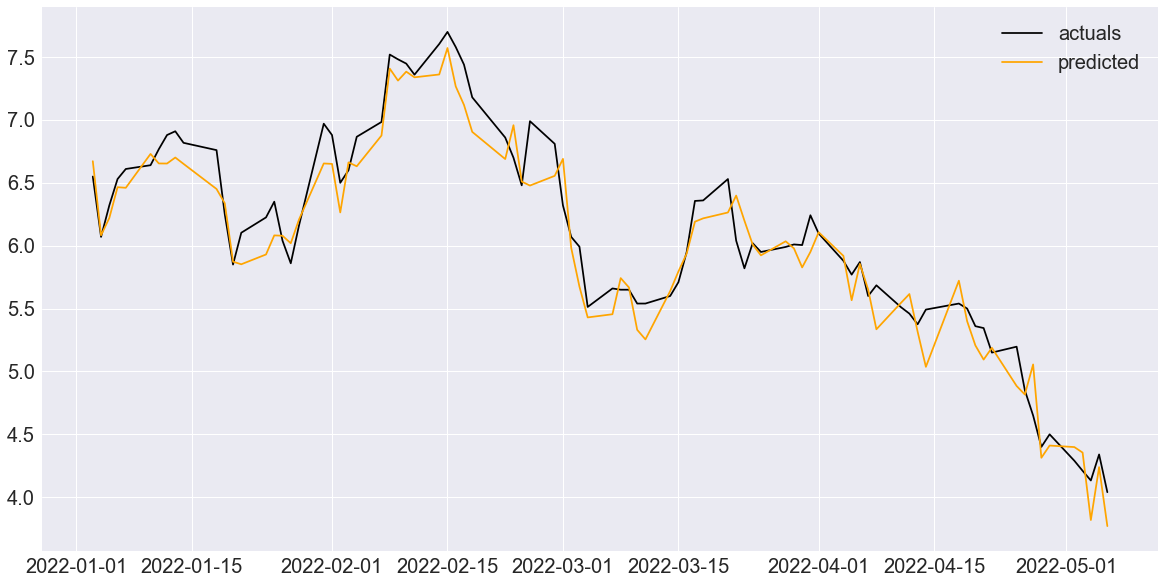

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['crlbf_next_close'], color='black')
ax.plot(y_test2['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy().copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013       4.500       4.750   
2022-05-04             5.736000               0.094       4.220       4.414   
2022-05-05             5.768000               0.032       4.200       4.250   
2022-05-06             5.808000               0.040       3.920       4.340   
2022-05-09             5.806000              -0.002       4.300       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

776

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

776
87


In [112]:
X_train3 = train3.drop('crlbf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [113]:
X_train3.shape

(776, 263)

In [114]:
y_train3 = train3['crlbf_next_close']
y_train3.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('crlbf_next_close', axis=1)
y_test3 = test3['crlbf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75      617200.0              6.67        0.08   
2022-01-04         6.55      465200.0              6.75       -0.20   
2022-01-05         6.07     1301600.0              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-03                 6.5559                0.0090       3.99       4.29   
2022-01-04                 6.5849                0.0290       4.14       4.18   
2022-01-05                 6.5730               -0.0119       4.06       4.19   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-03      3.94        4.20    2695300.0             3.92   
2022-01-04      3.95        4.11    2775200.0             4.20   
2022-01-05      3.85        3.86    2504300.0             4.11   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-03             4.11       0.28      0.071429                3.988   
2022-01-04             3.86      -0.09     -0.021429                4.018   
2022-01-05             3.81      -0.25     -0.060827                4.020   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-03               0.004                 4.097               -0.011   
2022-01-04               0.030                 4.098                0.001   
2022-01-05               0.002                 4.057               -0.041   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-03        8.99       9.450      8.642        8.750      448700.0   
2022-01-04        8.80       

In [118]:
X_test3.shape

(87, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([6.49306987, 5.92902211, 5.96732211, 6.37159654, 6.35360036])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.3318748125166419


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.28695770680617017


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['crlbf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['crlbf_next_close'])

In [126]:
y_test3['crlbf_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               3.981775
2022-05-03             4.210               3.956338
2022-05-04             4.133               3.643687
2022-05-05             4.340               4.150913
2022-05-06             4.040               3.705613

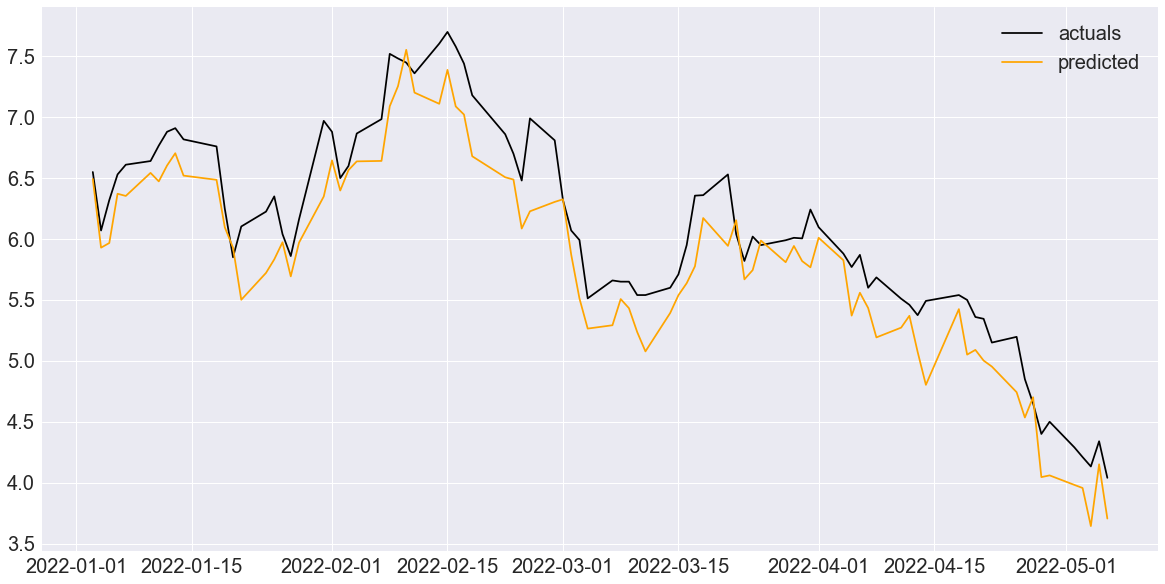

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['crlbf_next_close'], color='black')
ax.plot(y_test3['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy().copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013       4.500       4.750   
2022-05-04             5.736000               0.094       4.220       4.414   
2022-05-05             5.768000               0.032       4.200       4.250   
2022-05-06             5.808000               0.040       3.920       4.340   
2022-05-09             5.806000              -0.002       4.300       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

776

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

776
87


In [142]:
X_train4 = train4.drop('crlbf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [143]:
X_train4.shape

(776, 289)

In [144]:
y_train4 = train4['crlbf_next_close']
y_train4.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('crlbf_next_close', axis=1)
y_test4 = test4['crlbf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75      617200.0              6.67        0.08   
2022-01-04         6.55      465200.0              6.75       -0.20   
2022-01-05         6.07     1301600.0              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-03                 6.5559                0.0090       3.99       4.29   
2022-01-04                 6.5849                0.0290       4.14       4.18   
2022-01-05                 6.5730               -0.0119       4.06       4.19   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-03      3.94        4.20    2695300.0             3.92   
2022-01-04      3.95        4.11    2775200.0             4.20   
2022-01-05      3.85        3.86    2504300.0             4.11   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-03             4.11       0.28      0.071429                3.988   
2022-01-04             3.86      -0.09     -0.021429                4.018   
2022-01-05             3.81      -0.25     -0.060827                4.020   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-03               0.004                 4.097               -0.011   
2022-01-04               0.030                 4.098                0.001   
2022-01-05               0.002                 4.057               -0.041   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-03        8.99       9.450      8.642        8.750      448700.0   
2022-01-04        8.80       

In [148]:
X_test4.shape

(87, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([6.6460755 , 5.98501039, 5.9905383 , 6.38473933, 6.33413152])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.30446395301400886


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.2576818056573154


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['crlbf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['crlbf_next_close'])

In [156]:
y_test4['crlbf_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               4.038640
2022-05-03             4.210               4.016275
2022-05-04             4.133               3.702366
2022-05-05             4.340               4.253037
2022-05-06             4.040               3.719479

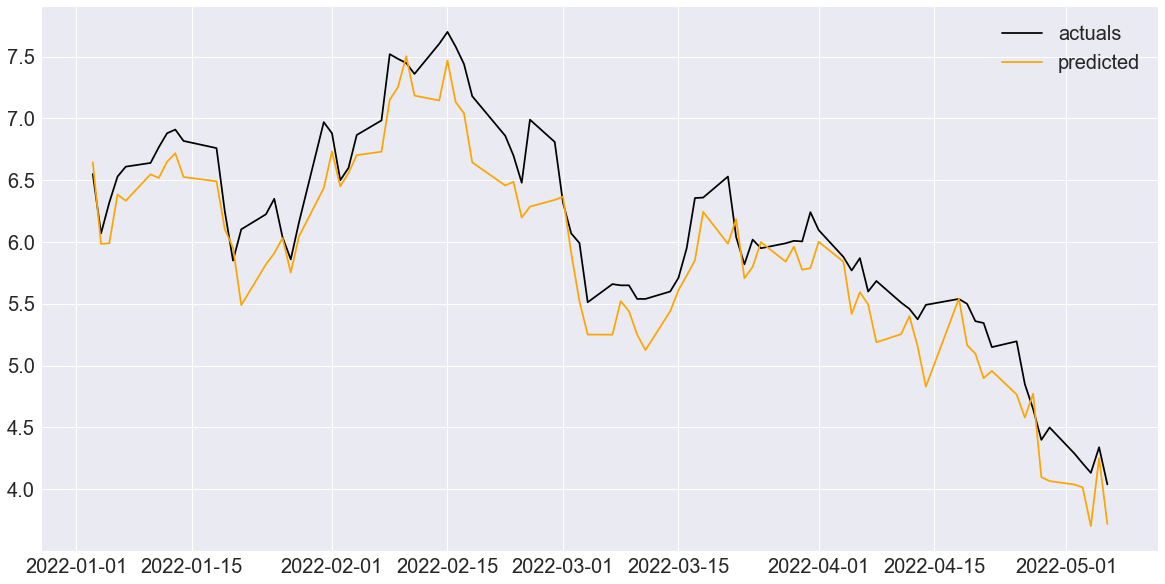

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['crlbf_next_close'], color='black')
ax.plot(y_test4['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy().copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013       4.500       4.750   
2022-05-04             5.736000               0.094       4.220       4.414   
2022-05-05             5.768000               0.032       4.200       4.250   
2022-05-06             5.808000               0.040       3.920       4.340   
2022-05-09             5.806000              -0.002       4.300       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

776

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

776
87


In [172]:
X_train5 = train5.drop('crlbf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [173]:
X_train5.shape

(776, 393)

In [174]:
y_train5 = train5['crlbf_next_close']
y_train5.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('crlbf_next_close', axis=1)
y_test5 = test5['crlbf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75      617200.0              6.67        0.08   
2022-01-04         6.55      465200.0              6.75       -0.20   
2022-01-05         6.07     1301600.0              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-03                 6.5559                0.0090       3.99       4.29   
2022-01-04                 6.5849                0.0290       4.14       4.18   
2022-01-05                 6.5730               -0.0119       4.06       4.19   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-03      3.94        4.20    2695300.0             3.92   
2022-01-04      3.95        4.11    2775200.0             4.20   
2022-01-05      3.85        3.86    2504300.0             4.11   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-03             4.11       0.28      0.071429                3.988   
2022-01-04             3.86      -0.09     -0.021429                4.018   
2022-01-05             3.81      -0.25     -0.060827                4.020   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-03               0.004                 4.097               -0.011   
2022-01-04               0.030                 4.098                0.001   
2022-01-05               0.002                 4.057               -0.041   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-03        8.99       9.450      8.642        8.750      448700.0   
2022-01-04        8.80       

In [178]:
X_test5.shape

(87, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([6.8232393 , 6.24377902, 6.3388482 , 6.62136817, 6.58860032])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.2627378509263914


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.2117076681179098


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['crlbf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['crlbf_next_close'])

In [186]:
y_test5['crlbf_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               4.197809
2022-05-03             4.210               4.156454
2022-05-04             4.133               3.863439
2022-05-05             4.340               4.293915
2022-05-06             4.040               3.847416

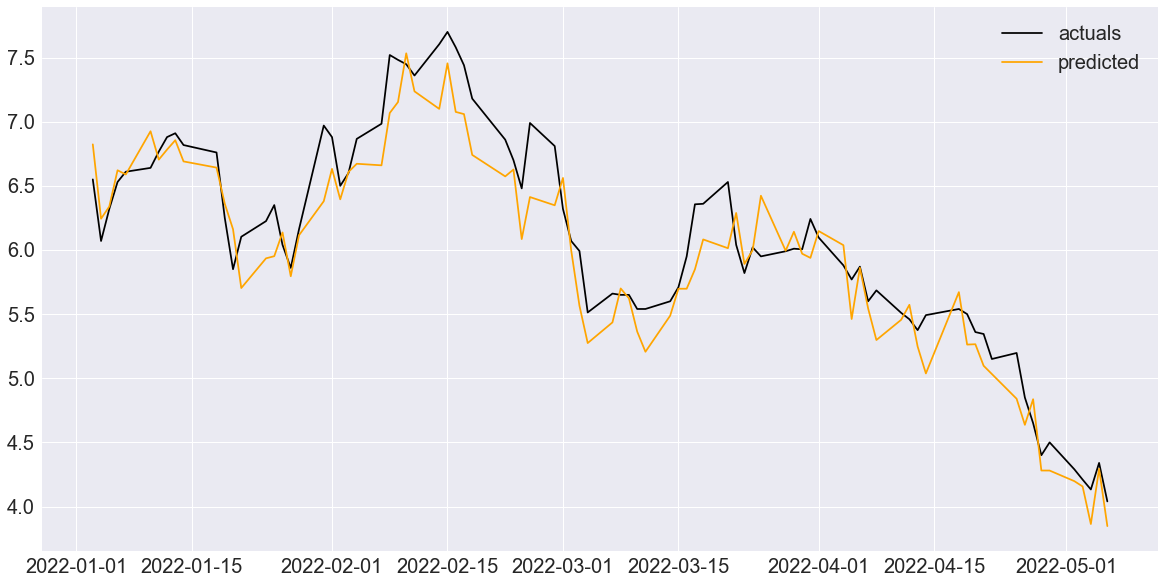

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['crlbf_next_close'], color='black')
ax.plot(y_test5['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CRLBF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy().copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-12-03     12    3  2018        4  34.500000  35.180000  32.360001   
2018-12-04     12    4  2018        4  32.860001  33.160000  31.219999   
2018-12-06     12    6  2018        4  28.790001  30.650000  28.100000   
2018-12-07     12    7  2018        4  32.389999  32.549999  30.799999   
2018-12-10     12   10  2018        4  31.459999  32.169998  30.209999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   
2018-12-07  31.400000     6149600       30.340000       31.020000  1.060000   
2018-12-10  31.020000     4580200       31.400000       33.160000 -0.380000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557           33.152000           0.356001   
2018-12-04    -0.056406           33.102000          -0.050000   
2018-12-06    -0.035294           32.370000          -0.732000   
2018-12-07     0.034937           32.014000          -0.356000   
2018-12-10    -0.012102           31.508001          -0.506000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   
2018-12-07            32.406000              -0.234       5.194       5.420   
2018-12-10            32.152000              -0.254       5.022       5.338   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013       4.500       4.750   
2022-05-04             5.736000               0.094       4.220       4.414   
2022-05-05             5.768000               0.032       4.200       4.250   
2022-05-06             5.808000               0.040       3.920       4.340   
2022-05-09             5.806000              -0.002       4.300       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

776

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

776
87


In [202]:
X_train6 = train6.drop('crlbf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open  cgc_High    cgc_Low  \
Date                                                                    
2018-12-03     12    3  2018        4  34.500000     35.18  32.360001   
2018-12-04     12    4  2018        4  32.860001     33.16  31.219999   
2018-12-06     12    6  2018        4  28.790001     30.65  28.100000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-12-03  33.330002    10851200       33.549999       31.450001 -0.219997   
2018-12-04  31.450001     6717200       33.330002       30.340000 -1.880001   
2018-12-06  30.340000    10718200       31.450001       31.400000 -1.110001   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-12-03    -0.006557              33.152           0.356001   
2018-12-04    -0.056406              33.102          -0.050000   
2018-12-06    -0.035294              32.370          -0.732000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-12-03            32.954000              -0.188       5.300       5.520   
2018-12-04            32.822001              -0.132       5.152       5.165   
2018-12-06            32.640000              -0.182       5.071       5.145   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-12-03      4.742        4.962      174800.0             0.000   
2018-12-04      4.186        4.340      269400.0             4.962   
2018-12-06      4.320        4.750      217100.0             4.340   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2018-12-03       0.000       0.000000                   0.0   
2018-12-04      -0.622      -0.125353                   0.0   
2018-12-06       0.410       0.094470                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-12-03                  0.0                    0.0                   0.0   
2018-12-04                  0.0                    0.0                   0.0   
2018-12-06                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-12-03       9.25     11.890      8.51       10.17   45161900.0   
2018-12-04      10.97     11.200     10.38       10.74   26371000.0   
2018-12-06       9.92     10.565      9.76       10.45   12016300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-12-03             9.15            10.74       1.02      0.111475   
2018-12-04            10.17            10.45       0.57      0.056047   
2018-12-06            10.74            12.72      -0.29     -0.027002   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-12-03                9.044               0.368                 8.733   
2018-12-04                9.534               0.490                 8.983   
2018-12-06                9.884               0.350                 9.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-12-03                0.161       5.487       6.500      4.550   
2018-12-04                0.250       4.666       4.705      3.883   
2018-12-06                0.225       4.079       5.478      4.048 

In [203]:
X_train6.shape

(776, 419)

In [204]:
y_train6 = train6['crlbf_next_close']
y_train6.head(3)

Date
2018-12-03    4.34
2018-12-04    4.75
2018-12-06    5.00
Name: crlbf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-29    6.66
2021-12-30    6.67
2021-12-31    6.75
Name: crlbf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('crlbf_next_close', axis=1)
y_test6 = test6['crlbf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-03      1    3  2022        1      8.86      9.64    8.800       9.30   
2022-01-04      1    4  2022        1      9.24      9.24    8.670       8.97   
2022-01-05      1    5  2022        1      8.94      9.15    8.351       8.37   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-03     7155500            8.73            8.97      0.57     0.065292   
2022-01-04     7900700            9.30            8.37     -0.33    -0.035484   
2022-01-05     7347900            8.97            8.21     -0.60    -0.066890   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-03               8.950             -0.030                9.160   
2022-01-04               8.940             -0.010                9.182   
2022-01-05               8.862             -0.078                9.053   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-03              -0.029        6.67        7.27      6.670   
2022-01-04               0.022        6.98        6.98      6.460   
2022-01-05              -0.129        6.41        6.70      6.035   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_diff  \
Date                                                                  
2022-01-03         6.75      617200.0              6.67        0.08   
2022-01-04         6.55      465200.0              6.75       -0.20   
2022-01-05         6.07     1301600.0              6.55       -0.48   

            crlbf_%change  crlbf_5day_avg_close  crlbf_5day_avg_diff  \
Date                                                                   
2022-01-03       0.011994                 6.638               -0.026   
2022-01-04      -0.029630                 6.648                0.010   
2022-01-05      -0.073282                 6.540               -0.108   

            crlbf_10day_avg_close  crlbf_10day_avg_diff  cron_Open  cron_High  \
Date                                                                            
2022-01-03                 6.5559                0.0090       3.99       4.29   
2022-01-04                 6.5849                0.0290       4.14       4.18   
2022-01-05                 6.5730               -0.0119       4.06       4.19   

            cron_Low  cron_Close  cron_Volume  cron_prev_close  \
Date                                                             
2022-01-03      3.94        4.20    2695300.0             3.92   
2022-01-04      3.95        4.11    2775200.0             4.20   
2022-01-05      3.85        3.86    2504300.0             4.11   

            cron_next_close  cron_diff  cron_%change  cron_5day_avg_close  \
Date                                                                        
2022-01-03             4.11       0.28      0.071429                3.988   
2022-01-04             3.86      -0.09     -0.021429                4.018   
2022-01-05             3.81      -0.25     -0.060827                4.020   

            cron_5day_avg_diff  cron_10day_avg_close  cron_10day_avg_diff  \
Date                                                                        
2022-01-03               0.004                 4.097               -0.011   
2022-01-04               0.030                 4.098                0.001   
2022-01-05               0.002                 4.057               -0.041   

            curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2022-01-03        8.99       9.450      8.642        8.750      448700.0   
2022-01-04        8.80       

In [208]:
X_test6.shape

(87, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    4.133
2022-05-05    4.340
2022-05-06    4.040
Name: crlbf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([6.9129049 , 6.25118768, 6.30201186, 6.58378824, 6.52361183])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.26242991025497103


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.21228951525583267


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['crlbf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['crlbf_next_close'])

In [216]:
y_test6['crlbf_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

crlbf_next_close  crlbf_pred_next_close
Date                                               
2022-05-02             4.290               4.238405
2022-05-03             4.210               4.170718
2022-05-04             4.133               3.852133
2022-05-05             4.340               4.336266
2022-05-06             4.040               3.797735

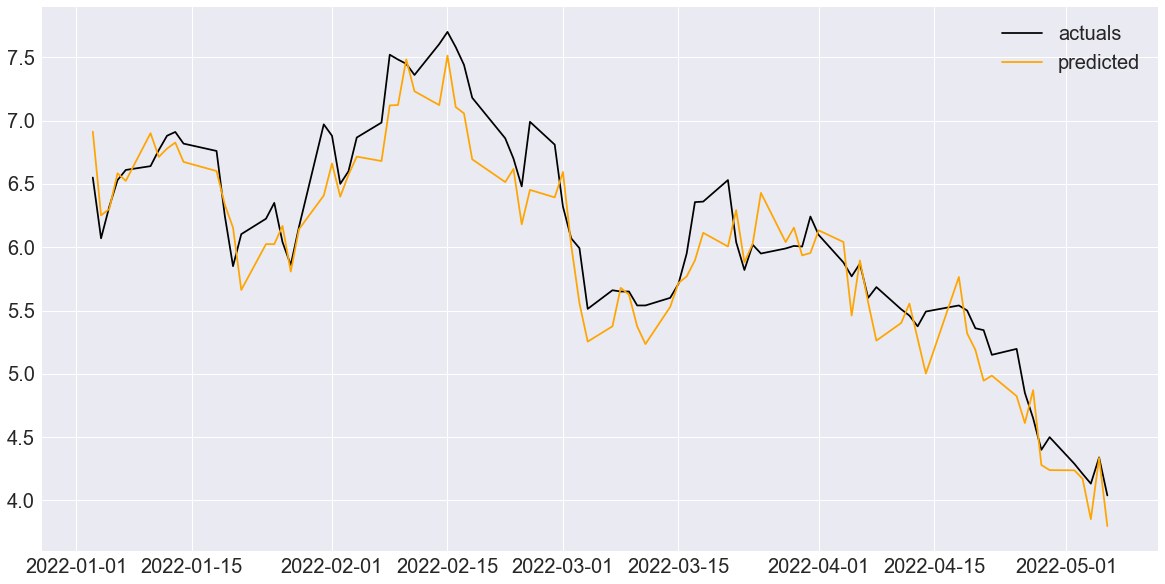

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['crlbf_next_close'], color='black')
ax.plot(y_test6['crlbf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.194813  0.154575   863         776   
2    1+ETFs+Dow  LinearRegression()  0.204173  0.166137   863         776   
0         1+Dow  LinearRegression()  0.222343  0.184202   863         776   
6  All+ETFs+Dow  LinearRegression()  0.262430  0.212290   863         776   
5      All+ETFs  LinearRegression()  0.262738  0.211708   863         776   
4       All+Dow  LinearRegression()  0.304464  0.257682   863         776   
3    All stocks  LinearRegression()  0.331875  0.286958   863         776   

   test_rows  columns  
1         87      160  
2         87      186  
0         87       56  
6         87      420  
5         87      394  
4         87      290  
3         87      264

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)